# Week 1 discussion

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from ipywidgets import interact, fixed

## Dataset 1: Papaya ripeness
 - Input: papaya number(no other info)
 - Output: Ripeness score (real number)
 - Objective: Estimate this function of ripeness f using hypothesis h

In [7]:
dataset = pd.read_csv('papaya.csv')
print(dataset)

   Ripeness
0         3
1         9
2         6
3         6
4         5
5         9
6         3
7         6
8         3
9         9


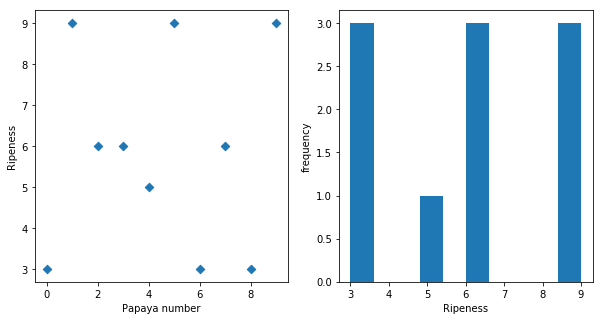

In [8]:
f, (p1, p2) = plt.subplots(1, 2)
f.set_figheight(5)
f.set_figwidth(10)
p1.scatter(np.arange(dataset.shape[0]), dataset['Ripeness'], marker='D')
p1.set(xlabel='Papaya number', ylabel='Ripeness')
p2.hist(dataset['Ripeness'])
p2.set(xlabel='Ripeness', ylabel='frequency');

 - What would be a resonable (constant) estimate for ripeness?
 - Value with maximum frequency!
 - Reasonable estimate of performance: number of wrong values

In [9]:
def f(h):
    plt.scatter(np.arange(dataset.shape[0]), dataset, marker='D')
    plt.xlabel("Papaya number")
    plt.ylabel("Ripeness")
    plt.axhline(h, color='r')
    mode = np.argmax(np.bincount(dataset['Ripeness']))
    plt.axhline(mode, color='g', linestyle=':')
    plt.show()
    return "Number of incorrect predictions = Loss = " + str(dataset['Ripeness'].shape[0] - np.sum(dataset['Ripeness'] == h))
interact(f, h=(0, 15, 1));

interactive(children=(IntSlider(value=7, description='h', max=15), Output()), _dom_classes=('widget-interact',…

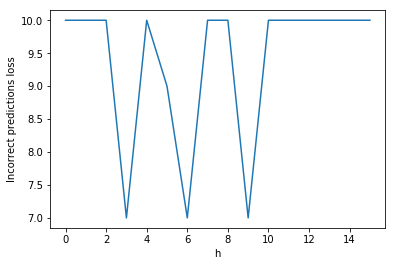

In [10]:
plt.plot(np.arange(16), [dataset['Ripeness'].shape[0] - np.sum(dataset['Ripeness'] == i) for i in range(16)])
mode = np.argmax(np.bincount(dataset['Ripeness']))
#plt.axvline(mode, color='g', linestyle=':')
plt.xlabel("h")
plt.ylabel("Incorrect predictions loss")
plt.show()

### How good is this choice for hypothesis and loss?
(Discuss)

## Dataset 2: Air quality dataset
First 100/9358 hourly averaged responses from an array of 5 metal oxide chemical sensors deployed on the field in an Italian city (De Vito et al., https://archive.ics.uci.edu/ml/datasets/Air+Quality)
 - Input: Sample number (i.e. time)
 - Output: PT08.S1 (tin oxide) hourly averaged sensor response
 - Objective: Estimate conc. of tin oxide using a constant hypothesis h

In [11]:
dataset = pd.read_csv('./AirQualityUCI/AirQualityUCI.csv', ';', nrows=100)
print(dataset)

          Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  \
0   10/03/2004  18.00.00    2,6         1360       150     11,9   
1   10/03/2004  19.00.00      2         1292       112      9,4   
2   10/03/2004  20.00.00    2,2         1402        88      9,0   
3   10/03/2004  21.00.00    2,2         1376        80      9,2   
4   10/03/2004  22.00.00    1,6         1272        51      6,5   
5   10/03/2004  23.00.00    1,2         1197        38      4,7   
6   11/03/2004  00.00.00    1,2         1185        31      3,6   
7   11/03/2004  01.00.00      1         1136        31      3,3   
8   11/03/2004  02.00.00    0,9         1094        24      2,3   
9   11/03/2004  03.00.00    0,6         1010        19      1,7   
10  11/03/2004  04.00.00   -200         1011        14      1,3   
11  11/03/2004  05.00.00    0,7         1066         8      1,1   
12  11/03/2004  06.00.00    0,7         1052        16      1,6   
13  11/03/2004  07.00.00    1,1         1144        29      3,

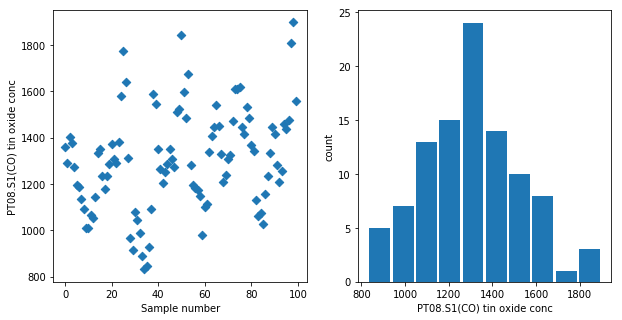

In [12]:
f, (p1, p2) = plt.subplots(1, 2)
f.set_figheight(5)
f.set_figwidth(10)
p1.scatter(np.arange(dataset.shape[0]), dataset['PT08.S1(CO)'], marker='D')
p1.set(xlabel='Sample number', ylabel='PT08.S1(CO) tin oxide conc')
p2.hist(dataset['PT08.S1(CO)'], bins=None, rwidth=0.9)
p2.set(xlabel='PT08.S1(CO) tin oxide conc', ylabel='count');

 - Hypothesis h: Conc. value with highest frequency (precision = 5)

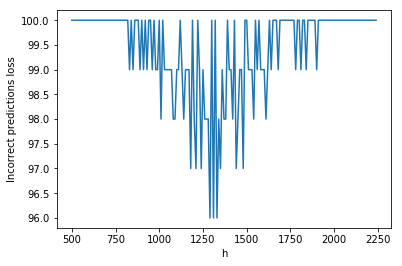

In [22]:
n = 10
def custom_round(x, base=5):
    return int(base * round(float(x)/base))
rounded_dataset = dataset['PT08.S1(CO)'].apply(lambda x: custom_round(x, base=n))
plt.plot(np.arange(500, 2250, n), [rounded_dataset.shape[0] - np.sum(rounded_dataset == i) for i in range(500, 2250, n)])
plt.xlabel("h")
plt.ylabel("Incorrect predictions loss")
plt.show()

### How good is this estimate?
 - Almost all equally bad (Discuss)

 - Another way to measure performance (loss) of h: Distance to farthest point
 - Best estimate of h using this loss: Mid-point of extreme points

In [23]:
def f(h):
    plt.scatter(np.arange(dataset['PT08.S1(CO)'].shape[0]), dataset['PT08.S1(CO)'], marker='D')
    plt.xlabel("Sample number")
    plt.ylabel("PT08.S1(CO) tin oxide conc")
    plt.axhline(h, color='r')
    midpoint = (np.max(dataset['PT08.S1(CO)']) + np.min(dataset['PT08.S1(CO)'])) / 2
    plt.axhline(midpoint, color='g', linestyle=':')
    plt.show()
    return "Farthest distance loss = " + str(np.max([np.abs(h - np.max(dataset['PT08.S1(CO)'])), np.abs(h - np.min(dataset['PT08.S1(CO)']))]))
interact(f, h=(500, 2250, n));

interactive(children=(IntSlider(value=1370, description='h', max=2250, min=500, step=10), Output()), _dom_clas…

Min loss = 538


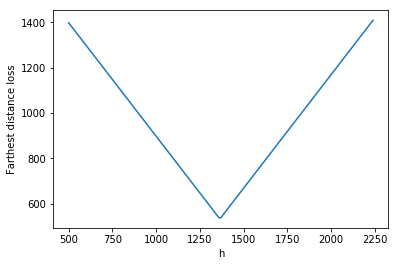

In [24]:
loss_arr = [np.max([np.abs(h - np.max(dataset['PT08.S1(CO)'])), np.abs(h - np.min(dataset['PT08.S1(CO)']))]) for h in range(500, 2250, n)]
midpoint = (np.max(dataset['PT08.S1(CO)']) + np.min(dataset['PT08.S1(CO)'])) / 2
#plt.axvline(midpoint, color='g', linestyle=':')
print("Min loss =", np.min(loss_arr))
plt.plot(np.arange(500, 2250, n), loss_arr)
plt.xlabel("h")
plt.ylabel("Farthest distance loss")
plt.show()

### Is this choice of hypothesis and loss better for this case?
 - What makes a loss function good?
 - Other loss functions for constant hypothesis?
 - Why constant hypothesis?
 (Discuss)